<a href="https://colab.research.google.com/github/DiegoDuran97/PreDiabetes-Classification/blob/main/Prediabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparing the Environment and Loading the Dataset

In [ ]:
# Install the following Packages
!pip install pycaret
!pip install shap
!pip install matplotlib networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.4 MB/s 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Install Kaggle package
!pip install kaggle

# Upload Kaggle API key (kaggle.json)

# Set up Kaggle config
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset
!unzip diabetes-health-indicators-dataset.zip -d /content/

# Move the dataset to Google Drive
!mv /content/dataset_directory /content/drive/MyDrive/


 66% 4.00M/6.03M [00:00<00:00, 5.81MB/s]
100% 6.03M/6.03M [00:01<00:00, 5.92MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: /content/diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes_binary_health_indicators_BRFSS2015.csv  
mv: cannot stat '/content/dataset_directory': No such file or directory


### Setting Up the Machine Learning Environment

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from pycaret.classification import *

# Load the dataset from Google Drive
df_path = '/content/drive/MyDrive/dataset_directory/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(df_path)

Exploratory Data Analysis

In [ ]:
# Check the column names in your DataFrame
print(df.columns)
print(df.info)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
<bound method DataFrame.info of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0      

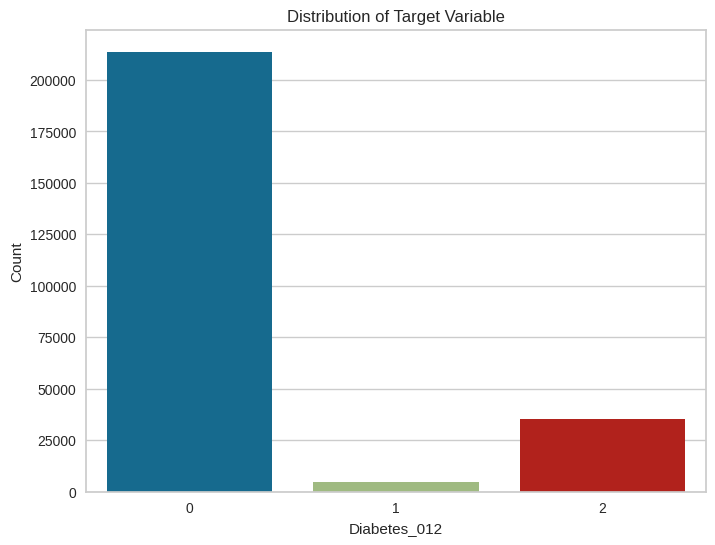

In [ ]:
# Convert 'Diabetes_012' to integer type
df['Diabetes_012'] = df['Diabetes_012'].astype(int)

# Visualize the updated distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split data into training and testing sets
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

### Step 1: Healthy Individuals vs Prediabetes

In [ ]:
# Step 1: Investigate Health Individuals vs. Prediabetes (Class 0 vs. Class 1)
df_subset_0_1 = df[df['Diabetes_012'].isin([0, 1])]
X_subset_0_1 = df_subset_0_1.drop(columns=['Diabetes_012'])
y_subset_0_1 = df_subset_0_1['Diabetes_012']

# Setup and train the classification model
exp_clf_0_1 = setup(
    data=df_subset_0_1,
    target='Diabetes_012',
    session_id=123,
    normalize=True,
    train_size=0.8,
    fix_imbalance=True
)

model_0_1 = create_model('xgboost')


#To compare and Evaluate all Classifers, Run the following code
#best_model = compare_models()
#tuned_model = tune_model(best_model)
#evaluate_model(tuned_model)

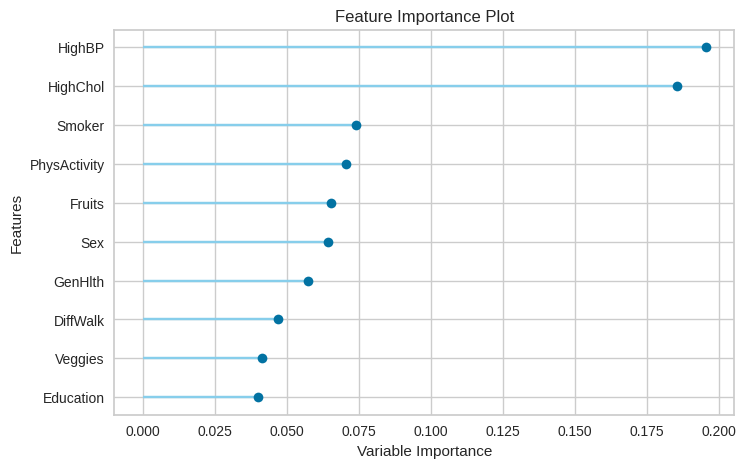

In [ ]:
# Feature Importance Plot for Step 1
plot_model(model_0_1, plot='feature')

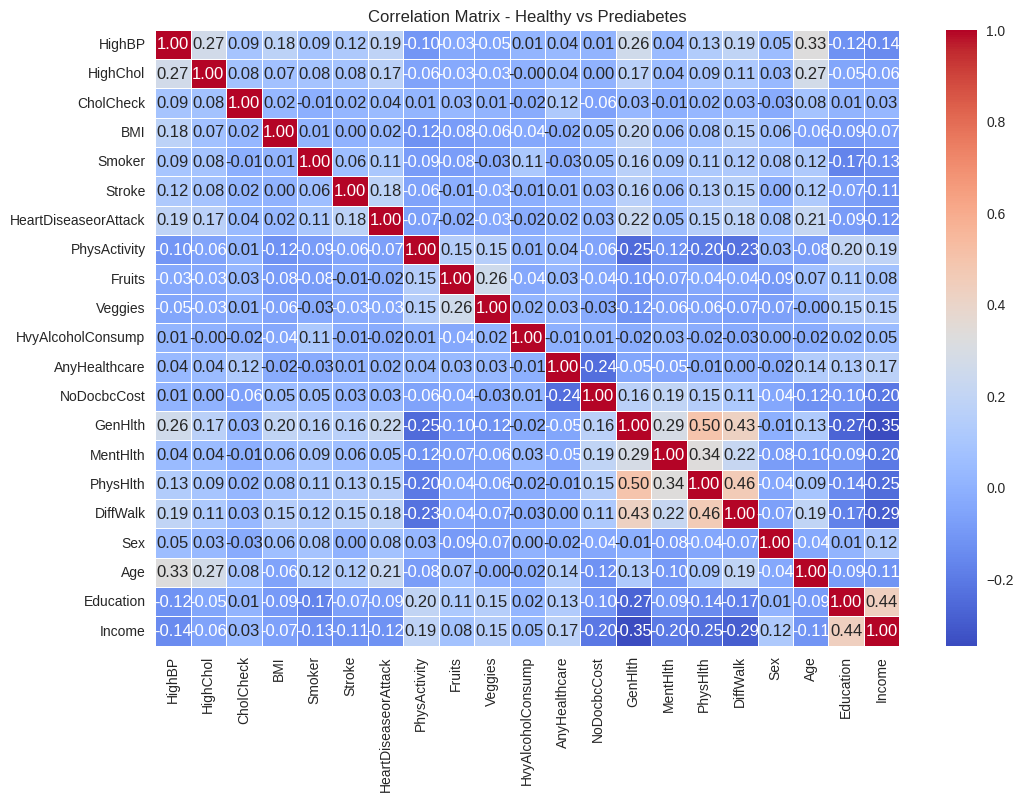

In [ ]:
# Create a correlation matrix
corr_matrix_0_1 = X_subset_0_1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_0_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Healthy vs Prediabetes')
plt.show()

In [ ]:
# Extract the top N features from Step 1
top_features_0_1 = get_config('X').columns.tolist()

# Get the feature importance scores for Step 1
feature_importance_0_1 = model_0_1.feature_importances_

# Create a DataFrame with feature importance and correlation values for Step 1
feature_info_0_1 = pd.DataFrame({
    'Feature': top_features_0_1,
    'Importance': feature_importance_0_1,
    'Correlation': abs(X_subset_0_1.corrwith(y_subset_0_1))
})


### Step 2: Prediabetes vs Diabetes

In [ ]:
# Step 2: Investigate Prediabetes vs. Diabetes (Class 1 vs. Class 2)
df_subset_1_2 = df[df['Diabetes_012'].isin([1, 2])]
X_subset_1_2 = df_subset_1_2.drop(columns=['Diabetes_012'])
y_subset_1_2 = df_subset_1_2['Diabetes_012']

# Setup and train the classification model for Step 2
exp_clf_1_2 = setup(
    data=df_subset_1_2,
    target='Diabetes_012',
    session_id=123,
    normalize=True,
    train_size=0.8,
    fix_imbalance=True
)

model_1_2 = create_model('ada')
#See step 1 to compare and evaluate all classifers

,Description,Value
0,Session id,123
1,Target,Diabetes_012
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(39977, 22)"
5,Transformed data shape,"(64548, 22)"
6,Transformed train set shape,"(56552, 22)"
7,Transformed test set shape,"(7996, 22)"
8,Numeric features,21
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8843,0.6182,0.8843,0.8593,0.8310,0.0089,0.0527
1,0.8843,0.5977,0.8843,0.7820,0.8300,0.0000,0.0000
2,0.8843,0.5803,0.8843,0.7820,0.8300,0.0000,0.0000
3,0.8843,0.6050,0.8843,0.7820,0.8300,0.0000,0.0000
4,0.8843,0.6279,0.8843,0.8401,0.8306,0.0041,0.0301
5,0.8843,0.6333,0.8843,0.7820,0.8300,0.0000,0.0000
6,0.8827,0.6041,0.8827,0.7813,0.8289,-0.0025,-0.0128
7,0.8840,0.5940,0.8840,0.7814,0.8296,0.0000,0.0000
8,0.8840,0.5825,0.8840,0.7814,0.8296,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

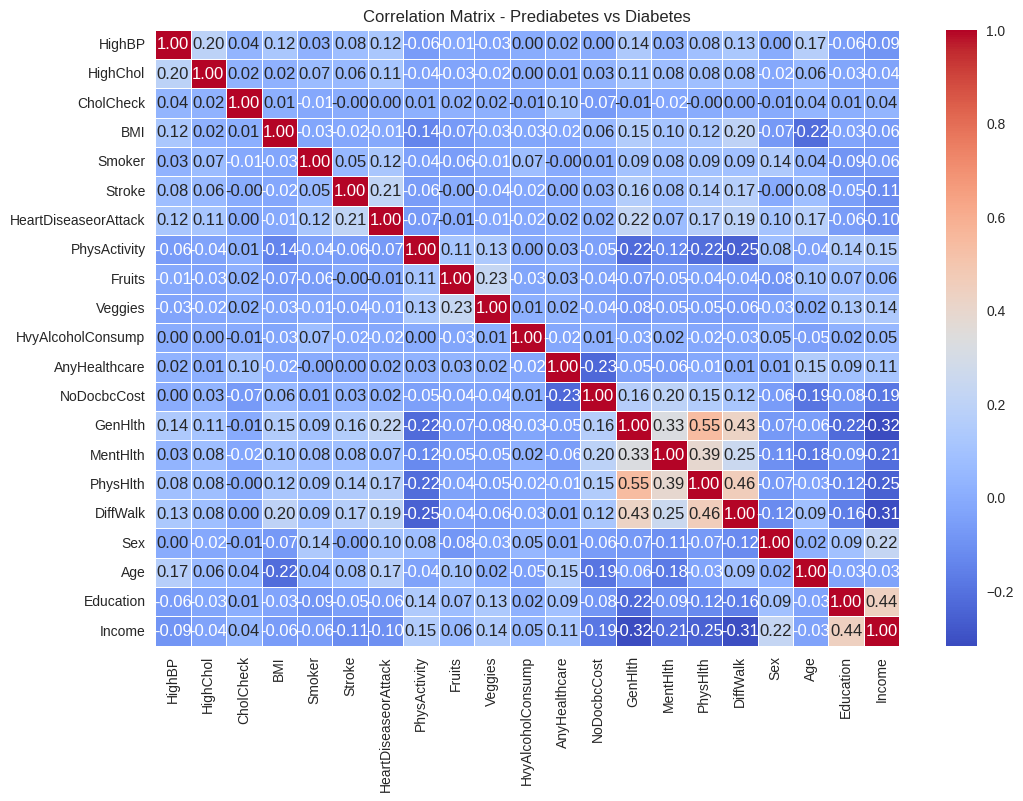

In [ ]:
# Create a correlation matrix
corr_matrix_1_2 = X_subset_1_2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_1_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Prediabetes vs Diabetes')
plt.show()

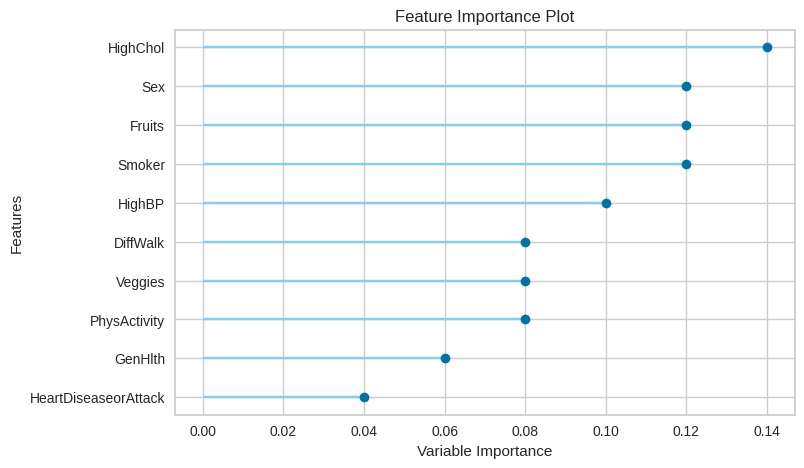

In [ ]:
# Feature Importance Plot for Step 2
plot_model(model_1_2, plot='feature')

In [ ]:
# Extract the top N features from Step 2
top_features_1_2 = get_config('X').columns.tolist()

# Get the feature importance scores for Step 2
feature_importance_1_2 = model_1_2.feature_importances_

# Create a DataFrame with feature importance and correlation values for Step 2
feature_info_1_2 = pd.DataFrame({
    'Feature': top_features_1_2,
    'Importance': feature_importance_1_2,
    'Correlation': abs(X_subset_1_2.corrwith(y_subset_1_2))
})

In [ ]:
 #Combine the top features from Steps 1 and 2
all_top_features = list(set(top_features_0_1 + top_features_1_2))

# Create a DataFrame with feature importance and correlation values for the integrated model
df_combined = pd.concat([df_subset_0_1, df_subset_1_2])
X_combined = df_combined[all_top_features]
y_combined = df_combined['Diabetes_012']

# Create a table with feature importance and correlation values for the integrated model
df_feature_info_combined = pd.DataFrame({
    'Importance_Step_1': feature_importance_0_1,
    'Importance_Step_2': feature_importance_1_2,
    'Correlation': abs(X_combined.corrwith(y_combined))
})

# Sort the table by the combined importance
df_feature_info_combined = df_feature_info_combined.sort_values(by=['Importance_Step_1', 'Importance_Step_2'], ascending=False)


# Print the entire table
print(df_feature_info_combined)

                      Importance_Step_1  Importance_Step_2  Correlation
HighBP                         0.195685               0.10     0.273626
AnyHealthcare                  0.185460               0.14     0.014635
HighChol                       0.073979               0.12     0.212174
Education                      0.070729               0.08     0.132658
Fruits                         0.065566               0.12     0.042601
Smoker                         0.064369               0.12     0.063546
Age                            0.057385               0.06     0.188055
NoDocbcCost                    0.047185               0.08     0.037523
PhysActivity                   0.041544               0.08     0.122752
CholCheck                      0.040154               0.00     0.068960
PhysHlth                       0.030978               0.04     0.176701
MentHlth                       0.024782               0.04     0.075092
Income                         0.022786               0.00     0

In [ ]:
#Omit the overlapping least important and correlated features from table above

# Omitted features
omitted_features = ['HvyAlcoholConsump', 'Veggies', 'DiffWalk', 'HeartDiseaseorAttack', 'Income']

# Combine the datasets from Steps 1 and 2
df_combined = pd.concat([df_subset_0_1, df_subset_1_2])

# Reset the index to avoid duplicate indices
df_combined = df_combined.reset_index(drop=True)

# Drop omitted features
X_combined = df_combined.drop(columns=['Diabetes_012'] + omitted_features)
y_combined = df_combined['Diabetes_012']

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=123)


### Step 3: Progressive Learning Model

In [ ]:
# Setup and train the classification model for Step 3 with insights from Steps 1 and 2
exp_clf_combined = setup(
    data=df_combined,
    target='Diabetes_012',
    session_id=123,
    normalize=True,
    train_size=0.8,
    fix_imbalance=True
)

# Create and train the Random Forest Classifier
model_0_1_2 = create_model('rf')
#See step 1 to compare and evaluate all classifers

,Description,Value
0,Session id,123
1,Target,Diabetes_012
2,Target type,Multiclass
3,Original data shape,"(258311, 22)"
4,Transformed data shape,"(564549, 22)"
5,Transformed train set shape,"(512886, 22)"
6,Transformed test set shape,"(51663, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8456,0.8160,0.8456,0.8182,0.8248,0.3621,0.3819
1,0.8521,0.8293,0.8521,0.8260,0.8312,0.3883,0.4102
2,0.8435,0.8205,0.8435,0.8145,0.8222,0.3557,0.3747
3,0.8442,0.8188,0.8442,0.8170,0.8242,0.3630,0.3806
4,0.8404,0.8209,0.8404,0.8120,0.8204,0.3501,0.3663
5,0.8453,0.8246,0.8453,0.8174,0.8244,0.3623,0.3818
6,0.8481,0.8308,0.8481,0.8218,0.8282,0.3773,0.3963
7,0.8447,0.8214,0.8447,0.8169,0.8243,0.3644,0.3825
8,0.8496,0.8271,0.8496,0.8231,0.8286,0.3770,0.3985


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model with more evaluation metrics
evaluate_model(model_0_1_2)

# Filter the test set to include only selected features
X_test_combined_filtered = X_test_combined[X_combined.columns]

# Make predictions on the filtered test set
predictions_combined = predict_model(model_0_1_2, data=X_test_combined_filtered)


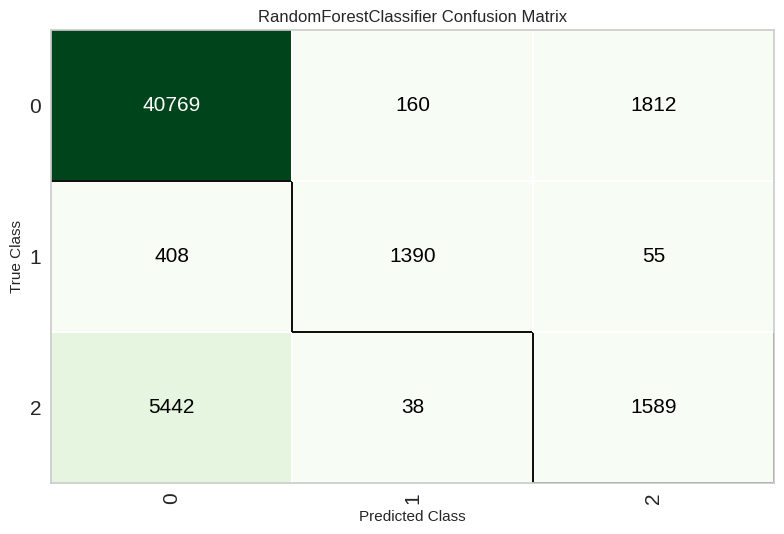

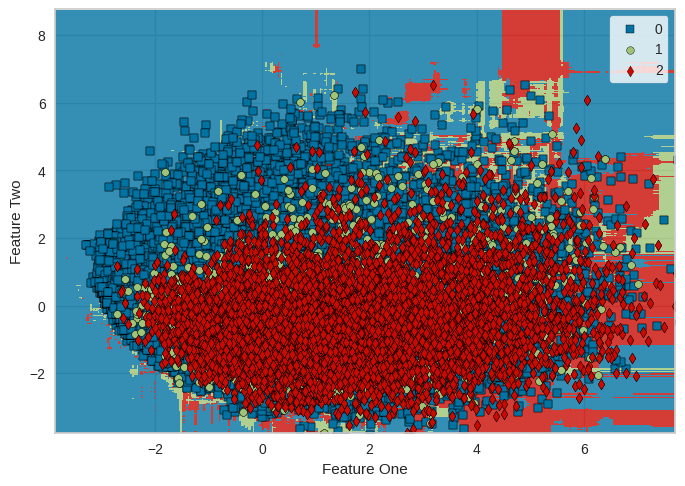

In [ ]:
# Create plots for model evaluation
plot_model(model_0_1_2, plot='confusion_matrix')
plot_model(model_0_1_2, plot='boundary')

### Step 4: Baseline Model

In [ ]:
# Step 4: Train a Model Without Progressive Learning (Baseline)
X_baseline = df.drop(columns=['Diabetes_012'])
y_baseline = df['Diabetes_012']
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=123)


In [ ]:
# Setup and train the classification model for Step 4 without progressive learning
exp_clf_baseline = setup(data=df, target='Diabetes_012', session_id=123, normalize=True, train_size=0.8, fix_imbalance=True)

model_baseline = create_model('rf') # - same classifier as progressive learning model
#model_baseline = create_model('xgboost') - most optimal classifier
#See step 1 to compare and evaluate all classifers

,Description,Value
0,Session id,123
1,Target,Diabetes_012
2,Target type,Multiclass
3,Original data shape,"(253680, 22)"
4,Transformed data shape,"(563622, 22)"
5,Transformed train set shape,"(512886, 22)"
6,Transformed test set shape,"(50736, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8387,0.7903,0.8387,0.7957,0.8094,0.2188,0.2415
1,0.8364,0.7877,0.8364,0.7927,0.8074,0.2119,0.2328
2,0.8381,0.7900,0.8381,0.7952,0.8096,0.2223,0.2436
3,0.8390,0.7874,0.8390,0.7957,0.8097,0.2207,0.2436
4,0.8353,0.7871,0.8353,0.7916,0.8064,0.2090,0.2289
5,0.8384,0.7862,0.8384,0.7949,0.8088,0.2164,0.2392
6,0.8387,0.7963,0.8387,0.7951,0.8087,0.2152,0.2386
7,0.8388,0.7885,0.8388,0.7953,0.8095,0.2195,0.2424
8,0.8395,0.7921,0.8395,0.7962,0.8099,0.2199,0.2436


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model with more evaluation metrics
evaluate_model(model_baseline)

# Make predictions on the test set
predictions_baseline = predict_model(model_baseline, data=X_test_baseline)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

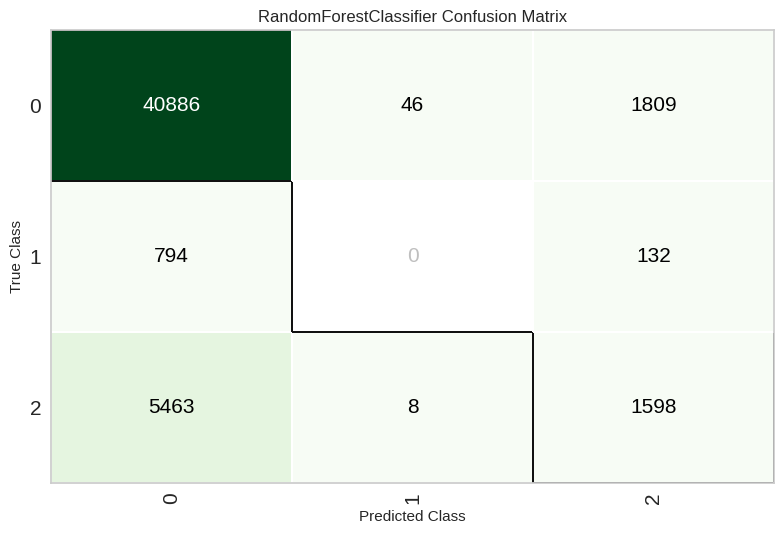

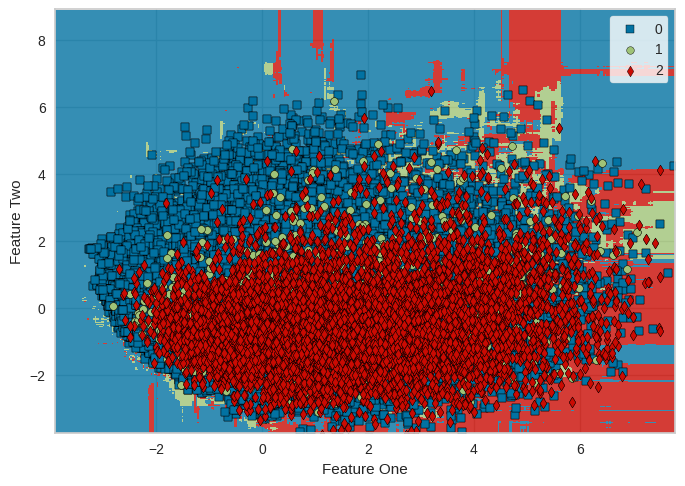

In [ ]:
# Create plots for model evaluation
plot_model(model_baseline, plot='confusion_matrix')
plot_model(model_baseline, plot='boundary')